# Overfitting (High Variance) Example for Decision Tree Classifier

In [3]:
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=13)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [4]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [5]:

# define the tree depths to evaluate
depth_values = [i for i in range(1, 41)]

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# evaluate a decision tree for each depth
test_scores= []
train_scores=[]
for i in depth_values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = metrics.accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = metrics.accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.681, test: 0.681
>2, train: 0.751, test: 0.752
>3, train: 0.782, test: 0.777
>4, train: 0.832, test: 0.819
>5, train: 0.872, test: 0.851
>6, train: 0.894, test: 0.861
>7, train: 0.921, test: 0.869
>8, train: 0.944, test: 0.886
>9, train: 0.961, test: 0.885
>10, train: 0.972, test: 0.886
>11, train: 0.981, test: 0.891
>12, train: 0.988, test: 0.888
>13, train: 0.994, test: 0.886
>14, train: 0.997, test: 0.887
>15, train: 0.998, test: 0.881
>16, train: 0.998, test: 0.887
>17, train: 0.999, test: 0.882
>18, train: 1.000, test: 0.885
>19, train: 1.000, test: 0.883
>20, train: 1.000, test: 0.882
>21, train: 1.000, test: 0.884
>22, train: 1.000, test: 0.875
>23, train: 1.000, test: 0.884
>24, train: 1.000, test: 0.883
>25, train: 1.000, test: 0.877
>26, train: 1.000, test: 0.877
>27, train: 1.000, test: 0.881
>28, train: 1.000, test: 0.887
>29, train: 1.000, test: 0.879
>30, train: 1.000, test: 0.886
>31, train: 1.000, test: 0.885
>32, train: 1.000, test: 0.881
>33, train: 1.000

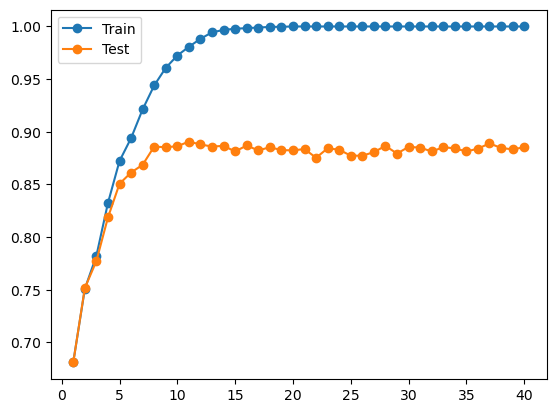

In [7]:
from matplotlib import pyplot
pyplot.plot(depth_values, train_scores, '-o', label='Train')
pyplot.plot(depth_values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

[Text(0.582972356789539, 0.9761904761904762, 'x[3] <= 0.399\ngini = 0.5\nsamples = 7000\nvalue = [3444, 3556]'),
 Text(0.2922430557822907, 0.9285714285714286, 'x[9] <= -1.035\ngini = 0.454\nsamples = 4013\nvalue = [2613, 1400]'),
 Text(0.1300280788820687, 0.8809523809523809, 'x[17] <= 0.021\ngini = 0.481\nsamples = 1116\nvalue = [448, 668]'),
 Text(0.09004832179704846, 0.8333333333333334, 'x[10] <= 0.936\ngini = 0.474\nsamples = 582\nvalue = [357, 225]'),
 Text(0.042706020634713335, 0.7857142857142857, 'x[2] <= 3.451\ngini = 0.499\nsamples = 377\nvalue = [181, 196]'),
 Text(0.017761525401593314, 0.7380952380952381, 'x[12] <= -1.173\ngini = 0.327\nsamples = 141\nvalue = [29, 112]'),
 Text(0.008358364894867442, 0.6904761904761905, 'x[5] <= -1.906\ngini = 0.489\nsamples = 33\nvalue = [19, 14]'),
 Text(0.004179182447433721, 0.6428571428571429, 'x[8] <= 1.655\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.0020895912237168606, 0.5952380952380952, 'gini = 0.0\nsamples = 11\nvalue = [

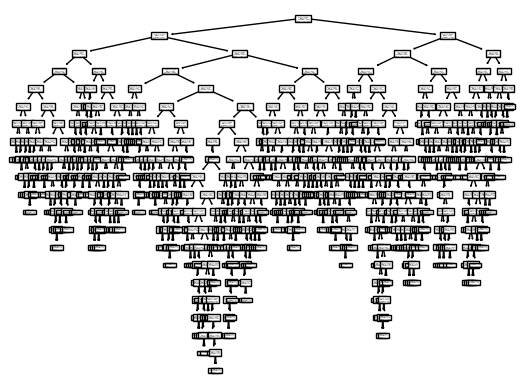

In [10]:
from sklearn.tree import export_graphviz,plot_tree
plot_tree(model)

# Example of underfitting (High Bias) in KNN classification

In [ ]:

# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=100, n_classes=20, n_informative=15, n_redundant=5, random_state=13)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
k_values = [i for i in range(1, 30)]
# evaluate a decision tree for each depth
for i in k_values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(k_values, train_scores, '-o', label='Train')
pyplot.plot(k_values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
make_classification??


In [ ]:
plot_tree(model)